In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('Thyroid Disease.csv')

# Display basic information about the dataset
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [3]:
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [4]:
# Rename the columns for better understanding
df.rename(columns={'Hx Smoking': 'Smoking History',
                   'Hx Radiothreapy': 'Radiotherapy History',
                   'Pathology': 'Types of Thyroid Cancer (Pathology)',
                   'T': 'Tumor',
                   'N': 'Lymph Nodes',
                   'M': 'Cancer Metastasis',
                  'Response' : 'Treatment Response'}, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Age                                  383 non-null    int64 
 1   Gender                               383 non-null    object
 2   Smoking                              383 non-null    object
 3   Smoking History                      383 non-null    object
 4   Radiotherapy History                 383 non-null    object
 5   Thyroid Function                     383 non-null    object
 6   Physical Examination                 383 non-null    object
 7   Adenopathy                           383 non-null    object
 8   Types of Thyroid Cancer (Pathology)  383 non-null    object
 9   Focality                             383 non-null    object
 10  Risk                                 383 non-null    object
 11  Tumor                                383 non-

In [6]:
# Data Preprocessing
# Handle missing values
df.dropna(inplace=True)

In [16]:
# Data Cleaning
# Handling missing values
imputer = SimpleImputer(strategy='mean')
# Encoding categorical variables
label_encoder = LabelEncoder()

In [8]:
# Convert columns with numeric values stored as strings to float
numeric_columns = ['Age', 'Thyroid Function', 'Tumor', 'Lymph Nodes', 'Cancer Metastasis'] # Add any other columns that should be numeric
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [17]:
# Handle non-numeric data
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column].astype(str))

df_cleaned = imputer.fit_transform(df)

C:\Users\Global\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


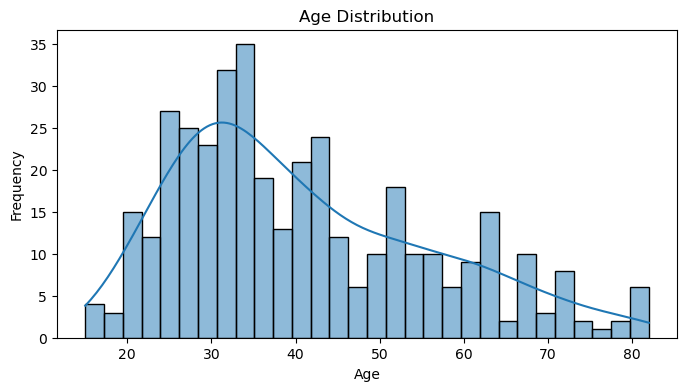

In [10]:
# Visualizations
# Age distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

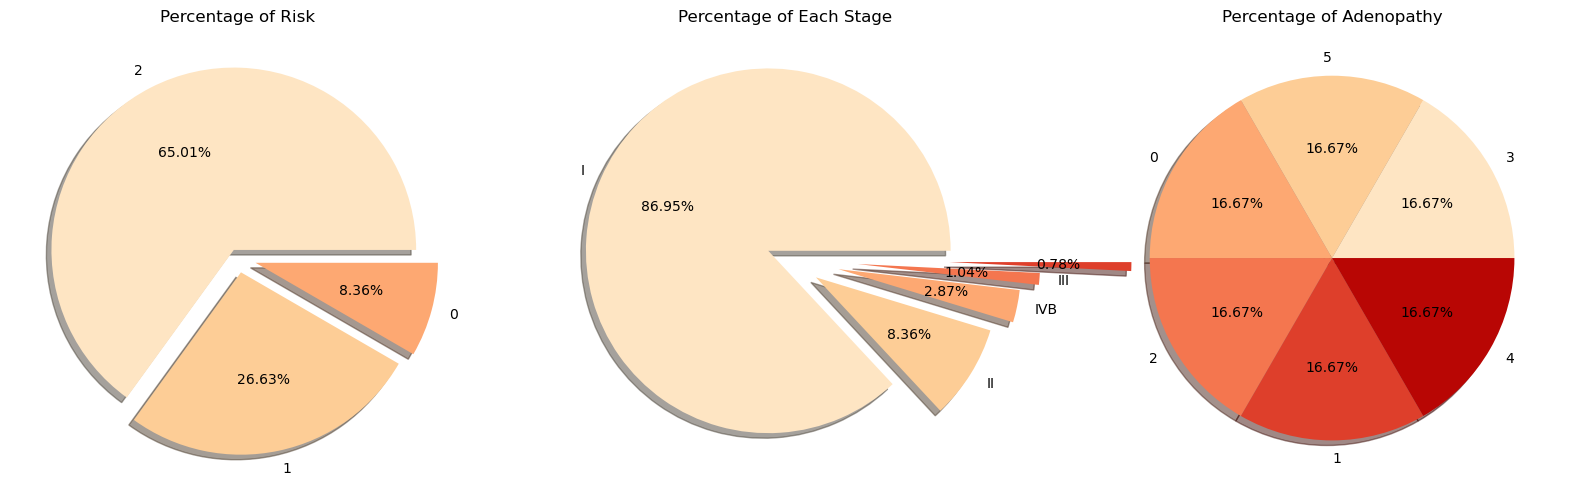

In [11]:
sns.set_palette("OrRd")
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# Pie chart for 'Risk'
risky = df['Risk'].value_counts()
risky.plot(kind='pie', autopct='%0.2f%%', explode=[0.05, 0.08, 0.1], labels=risky.index, shadow=True, ax=axes[0])
axes[0].set_title('Percentage of Risk')
axes[0].set_ylabel('')

# Pie chart for 'Stage'
Stage_of_Cancer = df['Stage'].value_counts()
Stage_of_Cancer.plot(kind='pie', autopct='%0.2f%%', labels=Stage_of_Cancer.index, explode=[0.1, 0.2, 0.3, 0.4, 0.9], shadow=True, ax=axes[1])
axes[1].set_title('Percentage of Each Stage')
axes[1].set_ylabel('')

# Pie chart for 'Adenopathy'
aden = df['Adenopathy'].value_counts()
aden.value_counts().plot(kind='pie', autopct='%0.2f%%', labels=aden.index, shadow=True, ax=axes[2])
axes[2].set_title('Percentage of Adenopathy')
axes[2].set_ylabel('')


plt.show()

In [12]:
# Prepare the data for modeling
X = df.drop(['Recurred'], axis=1)
y = df['Recurred']

In [13]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ValueError: could not convert string to float: 'I'